#  Student Information

     

### Wilfer Alexander Echavarria Vargas
## Student Numer:
    852538228     
## Date: 
    2022-06-15
    


# 2. Question 1. Task identification.
     Given the assigned data set, is this an association rule mining problem or a text mining problem? Explain your reasoning. (Analyse with Python, compare, explain)

<font color='blue'>
When analyzing the data contained in this dataset on the positive and negative or neutral feelings of people in airlines, we find that this is a data mining set problem, but it can also be an association problem, but for the purposes of this exercise we will concentrate on the text mining to train our model properly
The reason for choosing is a data mining problem because the chosen dataset allows us to organize and structure a complex text to clear the pertinent data. In addition, we will carry out the sentiment analysis, which consists of analyzing the emotions contained in the dataset.

the data set is structured since this, although it is a twitter analysis, already has a defined structure which is already organized in 15 columns and 14640 rows with their respective labels, but it is important to understand that most of the problems Based in social networks and other technologies that collect information, this information is unstructured and through text mining we can go from unstructured text to structured text, which will allow us to build an efficient machine learning model to process a large amount of data.

For this exercise we determine that it is a supervised learning model since we already have a previously labeled data set, that is, we already know the values of the target attributes for the data set we have, which are 3 Positive, Negative, Neutral

for this exercise we can apply the classification algorithms when the result to be predicted is a categorical attribute

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#sklearn for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE # Handling Imbalanced
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  

# Data Visualization 
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.text import Tokenizer
from termcolor import cprint
import seaborn as sns
import warnings   

from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.python import tf2
from tensorflow.python import tf2
import re
from textblob import TextBlob
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import time
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses


from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

warnings.filterwarnings('ignore')
%matplotlib inline  

ModuleNotFoundError: No module named 'tensorflow'

#  Tweets Data reading and constant value addition

# LOAD DATA

In [6]:
# Import csv file
df_Tweets= pd.read_csv("Tweets.csv")

In [7]:
#Get first five records
df_Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Exploratory data analysis

# DATA VISUALIZATION

In [8]:
#We are going to "sniff" the data, seeing its composition, statistics etc...
df_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
df_Tweets.shape
#our dataset contains 14640 records and 15 columns

(14640, 15)

Total Null Values in Dataset :
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


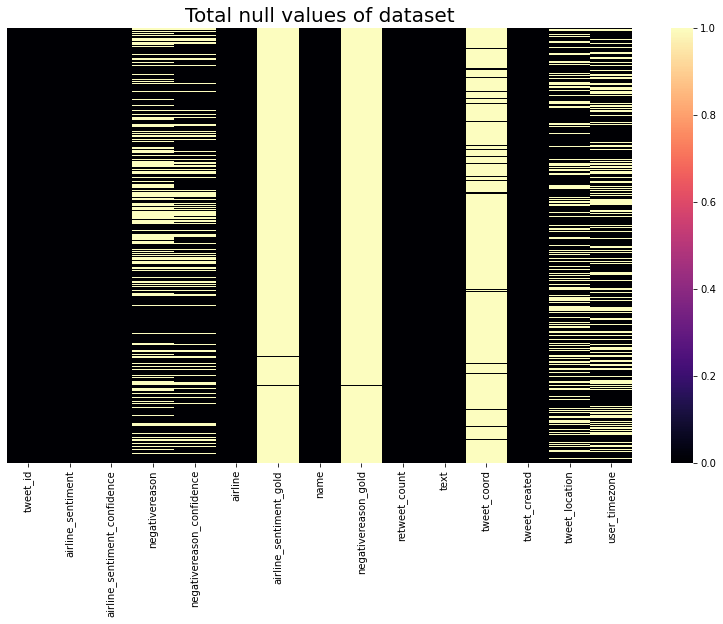

In [11]:
cprint('Total Null Values in Dataset :','green')
print(df_Tweets.isnull().sum()) # showing null values of train data
plt.figure(figsize=(14,8))


# visualize null values
sns.heatmap(df_Tweets.isnull(), yticklabels = False, cmap='magma')
plt.title('Total null values of dataset',size=20);

In [12]:
#We are going to fill it with zeros
df_Tweets["negativereason"] = df_Tweets["negativereason_confidence"] = df_Tweets["negativereason_confidence"] = df_Tweets["airline_sentiment_gold"] = df_Tweets["negativereason_gold"] = df_Tweets["tweet_coord"] = df_Tweets["tweet_location"]  = df_Tweets["user_timezone"].fillna(0)
df_Tweets.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),Virgin America,Eastern Time (US & Canada),cairdin,Eastern Time (US & Canada),0,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada),2015-02-24 11:35:52 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Pacific Time (US & Canada),Pacific Time (US & Canada),Virgin America,Pacific Time (US & Canada),jnardino,Pacific Time (US & Canada),0,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada),2015-02-24 11:15:59 -0800,Pacific Time (US & Canada),Pacific Time (US & Canada)


Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


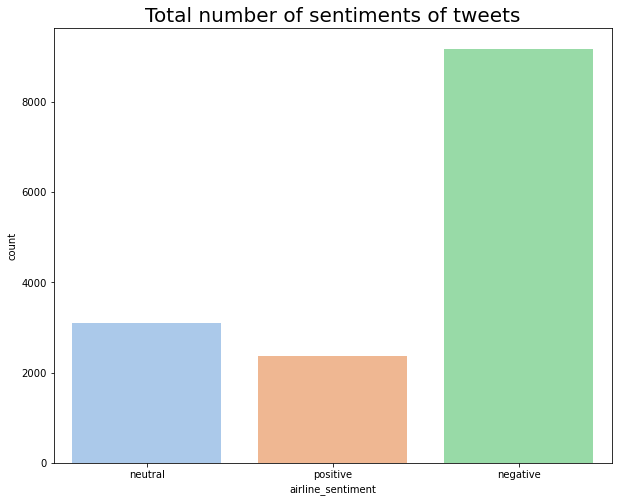

In [13]:
cprint("Total number of sentiments of tweets :",'green')
print(df_Tweets.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df_Tweets, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

In [14]:
#Number of sentiments in each category
df_Tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

our possible target values are negative which contains negative 9178, neutral 3099 and positive 2363

In [15]:
#List of airlines
airlines = df_Tweets['airline'].unique()
print("Airlines:", airlines)

Airlines: ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


# Positive, neutral and negative airline_sentiment per airline


In [16]:
def get_sentiment(df_Tweets, airlines):
    positives = []
    negatives = []
    neutrals = []

    for airline in airlines:
        positive = df_Tweets.query('@airline == airline and airline_sentiment == "positive"')['tweet_id'].count()
        negative = df_Tweets.query('@airline == airline and airline_sentiment == "negative"')['tweet_id'].count()
        neutral = df_Tweets.query('@airline == airline and airline_sentiment == "neutral"')['tweet_id'].count()
        
        positives.append(positive)
        negatives.append(negative)
        neutrals.append(neutral)
          
    return positives, negatives, neutrals
        

     
positives, negatives, neutrals = get_sentiment(df_Tweets, airlines)

sentiment_airlines_df = pd.DataFrame(index = airlines);
sentiment_airlines_df['neutrals'] = neutrals
sentiment_airlines_df['positives'] = positives
sentiment_airlines_df['negatives'] = negatives
sentiment_airlines_df

,neutrals,positives,negatives
Virgin America,171,152,181
United,697,492,2633
Southwest,664,570,1186
Delta,723,544,955
US Airways,381,269,2263
American,463,336,1960


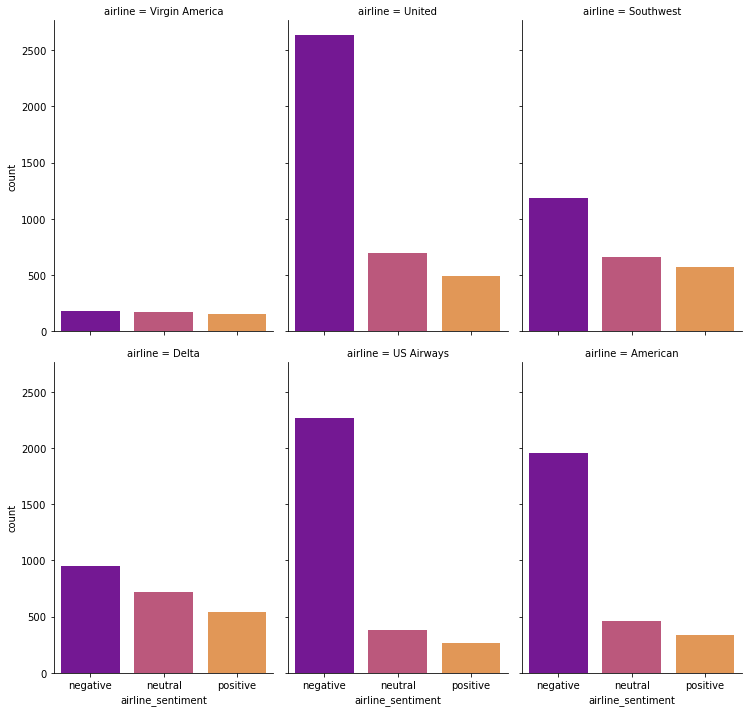

In [17]:
g = sns.FacetGrid(df_Tweets, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =df_Tweets.airline_sentiment.value_counts().index, palette='plasma')
plt.show()

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


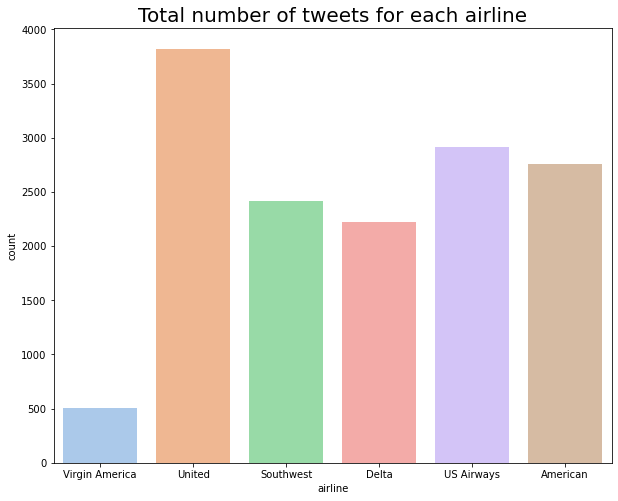

Total number of sentiment tweets for each airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [18]:
#otal number of tweets for each airline :
cprint("Total number of tweets for each airline :",'green')
print(df_Tweets.groupby('airline')['airline_sentiment'].count())



plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df_Tweets, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()


cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df_Tweets.loc[df_Tweets.airline == i].airline_sentiment.value_counts())

# Positive, neutral and negative airline_sentiment per airline in percentage (%)

In [19]:
sentiment_airlines_percentage_df = pd.DataFrame(index = airlines);
sentiment_airlines_percentage_df['neutrals (%)'] = list(map(lambda n: n / sum(neutrals) * 100, neutrals))
sentiment_airlines_percentage_df['positives (%)'] = list(map(lambda n: n / sum(positives) * 100, positives))
sentiment_airlines_percentage_df['negatives (%)'] = list(map(lambda n: n / sum(negatives) * 100, negatives))
sentiment_airlines_percentage_df

,neutrals (%),positives (%),negatives (%)
US Airways,5.517909,6.432501,1.972107
United,22.491126,20.820990,28.688167
American,21.426267,24.121879,12.922205
Southwest,23.330106,23.021583,10.405317
Delta,12.294288,11.383834,24.656788
Virgin America,14.940303,14.219213,21.355415


<font color='blue'>
If we import the data and check/confirm the data types by reading, data mining for text allows us to detect and segregate as the problem requires, on this data set we will have a text mining problem, since we are analyzing the tweets made by users to understand which is the best airline according to the feelings of its users. That is why we can say that based on that we perform a text analysis to determine the best airline according to users. We define that this data set is structured and to avoid problems of class imbalance we will use models such as smote and others that allow us to work with that class imbalance which will also help us to test the model

# Ratio of 'Negative', 'Positive' and 'Neutral

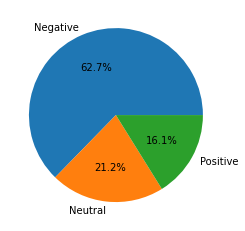

In [20]:
label=['Negative','Neutral','Positive']
plt.pie(df_Tweets.groupby('airline_sentiment')['airline_sentiment'].count(),autopct="%.1f%%",labels=label)
plt.show()

# Ratio of airplanes

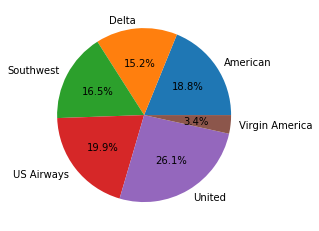

In [21]:
label=['American', 'Delta', 'Southwest', 'US Airways', 'United',
       'Virgin America']
plt.pie(df_Tweets.groupby('airline')['airline_sentiment'].count(),autopct="%.1f%%",labels=label)
plt.show()

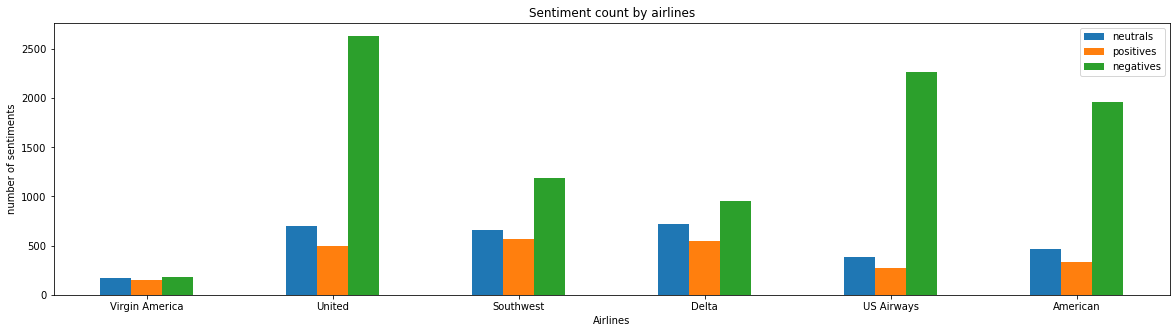

In [22]:
sentiment_airlines_df.plot.bar(rot=0, figsize=(20,5))
plt.title('Sentiment count by airlines')
plt.xlabel('Airlines')
plt.ylabel('number of sentiments')
plt.show()

In [23]:
# Split text of Sentiments    
positive = df_Tweets[df_Tweets['airline_sentiment'] == 'positive'].text
neutral  = df_Tweets[df_Tweets['airline_sentiment'] == 'neutral'].text
negative  = df_Tweets[df_Tweets['airline_sentiment'] == 'negative'].text

<font color='red'>
Feedback: 
    
  An extensive desciptive analysis is done with help of charts. The solution includes basic definitional explanations, e.g. what is the difference between structured and unstructured data, is the analysis type unsupervised, supervised or both, some important characteristics of the convenient analysis type. Missing values are also checked and statistical properties of the data are provided with help if visual elements.
    
</font>

# Question 2. Analyse the dataset potential.
## Does the dataset you have been assigned have a specific class associated to the instances of the dataset? Can this be considered a classification problem, regression, or would ## clustering be a better choice? Are there problems in the dataset? What other analysis can you think about? What about the features of the dataset, anything important to report?
## Explain your reasoning and use charting where appropriate. (Analyse with Python, compare, explain.)

<font color='blue'>
We create a new data set with the variables that interest us, which are our categorical variables, that we are only going to need 2 columns of the entire data set, with which we solve the problem of missing data for the analysis, that is why We are not going to analyze the missing data anymore since they are we will be able to carry out the correct analysis

<font color='blue'>
our dataset no longer has missing values so we can train the model

# Apply histogram (distribution of data) on airline_sentiment to check for potential class imbalance

What is the worst negative reason ?

<font color='blue'>
when validating the data we find that the class is unbalanced! Negative class overrepresented! For this case, what we will do is balance our data set to be able to train the models and facilitate the analysis of the data.
    
Since we already know that the dataset is very unbalanced, what we will do is take it towards the positive value to take a more reliable data sample and be able to balance the datase

We will also create a model treating the categorical values by converting them into numbers in order to train a linear regression model.

In [25]:
dfnegative=df_Tweets.loc[df_Tweets['airline_sentiment']=='negative']
dfpositive=df_Tweets.loc[df_Tweets['airline_sentiment']=='positive']
dfneutral=df_Tweets.loc[df_Tweets['airline_sentiment']=='neutral']

In [26]:
dfnegative=dfnegative.sample(n=2363)
dfneutral=dfneutral.sample(n=2363)
len(dfnegative)
len(dfneutral)

2363

<AxesSubplot:>

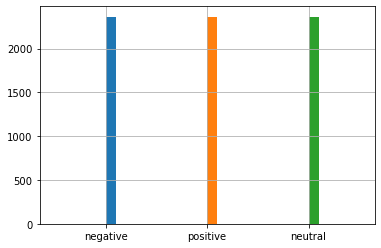

In [27]:
dfnegative['airline_sentiment'].hist()
dfpositive['airline_sentiment'].hist()
dfneutral['airline_sentiment'].hist()

<font color='blue'>
we already have our balanced data sample

In [28]:
df_Tweets=dfnegative.append(dfneutral).append(dfpositive)
len(df_Tweets)

# new sample 7089

7089

 # Can this be considered a classification problem, regression, or would clustering be a better choice? 
 
 <font color='blue'>
This is not a regression problem since we are not looking at numerical data.
it can be grouping since we can group several data or similar aspects in the data set.
But really this is a classification since it is categorical which will not allow analyzing specific words in the data set.

For this data set we could also take the 3 classes negative, positive and neutral to numerical values to perform a regression problem, which we will also detail below.
  

# Are there problems in the dataset?
 <font color='blue'>
This data model can present problems between the classification of neutral and positive tweets, it is the only thing that could give us problems in the data analysis that we are carrying out.

in the data set there are several problems such as missing values in the data, which were solved by creating a new data set and validating that there were no missing values, and those missing values were replaced by 0 so as not to have problems with missing data. We also found that the classes they are unbalanced but these are balanced by creating a new data set by taking the sample values of the classes to the total of the positive classes in the data set.

In [29]:
print(df_Tweets.groupby('airline_sentiment').size())

airline_sentiment
negative    2363
neutral     2363
positive    2363
dtype: int64


In [30]:
print(df_Tweets.groupby('text').size())

text
"LOL you guys are so on it" - me, had this been 4 months ago...“@JetBlue: Our fleet's on fleek. http://t.co/LYcARlTFHl”                    1
#Real RT @JetBlue: Our fleet's on fleek. http://t.co/ERzht75kqZ                                                                            1
. @SouthwestAir condescension must be a quality your co rewards. Your tone reeks of it                                                     1
..... Can you not? “@JetBlue: Our fleet's on fleek. http://t.co/udPq0flIQo”                                                                1
.@AmericanAir @C2Next Would be great to get some help too! I've been trying since last night to get through.                               1
                                                                                                                                          ..
😢😢 RT“@JetBlue: @Peaches275 Oh no! Unfortunately, the code must be entered at the time of purchase in order to qualify for the points.”    1
😩😂😂😂😂 “@

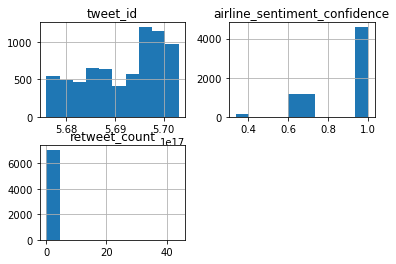

In [31]:
df_Tweets.drop(['airline_sentiment'],1).hist()
plt.show()

# We are going to deal with non-numeric data

In [32]:
#We are going to deal with non-numeric data
df_Tweets['airline_sentiment'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [33]:
# I replace them with a numerical value
valores_cross = {"airline_sentiment":  {'neutral':1, 'positive':2, 'negative':3}}
df_Tweets.replace(valores_cross, inplace=True)
df_Tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11123,568491905903939584,3,1.0000,Central Time (US & Canada),Central Time (US & Canada),US Airways,Central Time (US & Canada),jekyllandheid12,Central Time (US & Canada),0,"@USAirways your app is bad, and you should fee...",Central Time (US & Canada),2015-02-19 11:26:47 -0800,Central Time (US & Canada),Central Time (US & Canada)
6225,568110095646781440,3,1.0000,Central Time (US & Canada),Central Time (US & Canada),Southwest,Central Time (US & Canada),brendanpshannon,Central Time (US & Canada),0,5 hour delay = shortly?“@SouthwestAir: @brenda...,Central Time (US & Canada),2015-02-18 10:09:36 -0800,Central Time (US & Canada),Central Time (US & Canada)
5154,569301668904329216,3,1.0000,0,0,Southwest,0,Laughable_con,0,0,@SouthwestAir you are the worst airline. Congr...,0,2015-02-21 17:04:29 -0800,0,NaN
6557,567780076926693376,3,1.0000,0,0,Southwest,0,KentScheidegger,0,0,@SouthwestAir How? It is not possible to call ...,0,2015-02-17 12:18:13 -0800,0,NaN
9950,569602860020850688,3,1.0000,0,0,US Airways,0,JeffersRich,0,0,"@USAirways Flight 4454 aircraft at gate, but ...",0,2015-02-22 13:01:19 -0800,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,569590013278756865,2,0.6274,Eastern Time (US & Canada),Eastern Time (US & Canada),American,Eastern Time (US & Canada),Flora_Lola_NYC,Eastern Time (US & Canada),0,@AmericanAir Love the new planes for the JFK-L...,Eastern Time (US & Canada),2015-02-22 12:10:16 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
14625,569589643487928321,2,1.0000,0,0,American,0,DrCaseyJRudkin,0,0,@AmericanAir Flight 236 was great. Fantastic c...,0,2015-02-22 12:08:48 -0800,0,NaN
14628,569588651925098496,2,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),American,Eastern Time (US & Canada),jlhalldc,Eastern Time (US & Canada),0,Thank you. “@AmericanAir: @jlhalldc Customer R...,Eastern Time (US & Canada),2015-02-22 12:04:51 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
14630,569588473050611712,2,1.0000,0,0,American,0,Laurelinesblog,0,0,@AmericanAir Thanks! He is.,0,2015-02-22 12:04:09 -0800,0,NaN


In [34]:
df_Tweets['airline_sentiment'].unique()

array([3, 1, 2], dtype=int64)

In [35]:
df_Tweets['airline'].unique()

array(['US Airways', 'Southwest', 'United', 'American', 'Delta',
       'Virgin America'], dtype=object)

In [36]:
# I replace them with a numerical value
valores_cross = {"airline":  {'US Airways':1, 'United':2, 'Southwest':3, 'American':4,'Delta':5,'Virgin America':6}}
df_Tweets.replace(valores_cross, inplace=True)
df_Tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11123,568491905903939584,3,1.0000,Central Time (US & Canada),Central Time (US & Canada),1,Central Time (US & Canada),jekyllandheid12,Central Time (US & Canada),0,"@USAirways your app is bad, and you should fee...",Central Time (US & Canada),2015-02-19 11:26:47 -0800,Central Time (US & Canada),Central Time (US & Canada)
6225,568110095646781440,3,1.0000,Central Time (US & Canada),Central Time (US & Canada),3,Central Time (US & Canada),brendanpshannon,Central Time (US & Canada),0,5 hour delay = shortly?“@SouthwestAir: @brenda...,Central Time (US & Canada),2015-02-18 10:09:36 -0800,Central Time (US & Canada),Central Time (US & Canada)
5154,569301668904329216,3,1.0000,0,0,3,0,Laughable_con,0,0,@SouthwestAir you are the worst airline. Congr...,0,2015-02-21 17:04:29 -0800,0,NaN
6557,567780076926693376,3,1.0000,0,0,3,0,KentScheidegger,0,0,@SouthwestAir How? It is not possible to call ...,0,2015-02-17 12:18:13 -0800,0,NaN
9950,569602860020850688,3,1.0000,0,0,1,0,JeffersRich,0,0,"@USAirways Flight 4454 aircraft at gate, but ...",0,2015-02-22 13:01:19 -0800,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,569590013278756865,2,0.6274,Eastern Time (US & Canada),Eastern Time (US & Canada),4,Eastern Time (US & Canada),Flora_Lola_NYC,Eastern Time (US & Canada),0,@AmericanAir Love the new planes for the JFK-L...,Eastern Time (US & Canada),2015-02-22 12:10:16 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
14625,569589643487928321,2,1.0000,0,0,4,0,DrCaseyJRudkin,0,0,@AmericanAir Flight 236 was great. Fantastic c...,0,2015-02-22 12:08:48 -0800,0,NaN
14628,569588651925098496,2,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),4,Eastern Time (US & Canada),jlhalldc,Eastern Time (US & Canada),0,Thank you. “@AmericanAir: @jlhalldc Customer R...,Eastern Time (US & Canada),2015-02-22 12:04:51 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
14630,569588473050611712,2,1.0000,0,0,4,0,Laurelinesblog,0,0,@AmericanAir Thanks! He is.,0,2015-02-22 12:04:09 -0800,0,NaN


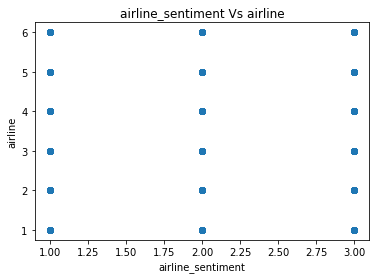

In [37]:
#Let's analyze them again, painting some graphs
import matplotlib.pyplot as plt
plt.scatter(x = df_Tweets['airline_sentiment'], y=df_Tweets['airline'])
plt.title('airline_sentiment Vs airline')
plt.xlabel('airline_sentiment')
plt.ylabel('airline')
plt.show()

In [38]:
sentiment_df_train= df_Tweets.sample(frac=0.8,random_state=0)
datos_test = df_Tweets.drop(sentiment_df_train.index)

In [39]:
sentiment_df_train

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
191,569304030847090688,3,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),6,Eastern Time (US & Canada),alexrkonrad,Eastern Time (US & Canada),0,@VirginAmerica trying to book a flight with yo...,Eastern Time (US & Canada),2015-02-21 17:13:52 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
10576,569167658698067970,3,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),1,Eastern Time (US & Canada),smash_tag,Eastern Time (US & Canada),0,"@USAirways ""Owen F"" at DCA Gate 42: #rude.",Eastern Time (US & Canada),2015-02-21 08:11:59 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
8144,568724024362037248,1,0.6907,0,0,5,0,donnatoo61,0,0,@JetBlue Is it June yet? 😊,0,2015-02-20 02:49:08 -0800,0,NaN
4665,569951879825907713,2,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),3,Eastern Time (US & Canada),AnnCompton,Eastern Time (US & Canada),1,@SouthwestAir Your Terry is our hero! Got my h...,Eastern Time (US & Canada),2015-02-23 12:08:12 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
2647,568972136322375680,2,0.6749,0,0,2,0,DManonog,0,0,@united thank you.,0,2015-02-20 19:15:02 -0800,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12423,570192886689628160,2,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),4,Eastern Time (US & Canada),rkflyga,Eastern Time (US & Canada),0,@AmericanAir thanks! Flight 2160 today. Great ...,Eastern Time (US & Canada),2015-02-24 04:05:52 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
5972,568452051740413952,2,1.0000,Pacific Time (US & Canada),Pacific Time (US & Canada),3,Pacific Time (US & Canada),erinpeep,Pacific Time (US & Canada),0,@SouthwestAir That would be great. Thank you! ...,Pacific Time (US & Canada),2015-02-19 08:48:25 -0800,Pacific Time (US & Canada),Pacific Time (US & Canada)
8465,568237879337422848,2,0.6857,Atlantic Time (Canada),Atlantic Time (Canada),5,Atlantic Time (Canada),amourEspinosa,Atlantic Time (Canada),0,@JetBlue u cool,Atlantic Time (Canada),2015-02-18 18:37:22 -0800,Atlantic Time (Canada),Atlantic Time (Canada)
14391,569621883282280448,2,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),4,Eastern Time (US & Canada),kidith_paulino,Eastern Time (US & Canada),0,@AmericanAir AA2416 on time and awesome flight...,Eastern Time (US & Canada),2015-02-22 14:16:54 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)


In [40]:
datos_test

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11123,568491905903939584,3,1.0000,Central Time (US & Canada),Central Time (US & Canada),1,Central Time (US & Canada),jekyllandheid12,Central Time (US & Canada),0,"@USAirways your app is bad, and you should fee...",Central Time (US & Canada),2015-02-19 11:26:47 -0800,Central Time (US & Canada),Central Time (US & Canada)
9824,569650751598944256,3,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),1,Eastern Time (US & Canada),Little_BeerGirl,Eastern Time (US & Canada),0,@USAirways any way to tell our gate we are goi...,Eastern Time (US & Canada),2015-02-22 16:11:37 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
11322,568213769798578176,3,1.0000,0,0,1,0,LinseyGarwood,0,0,@USAirways ...Loosing a lot of business by usi...,0,2015-02-18 17:01:34 -0800,0,NaN
10549,569192350607671297,3,1.0000,0,0,1,0,The_Dan_Kelly,0,0,@USAirways chose you for a flight with very ti...,0,2015-02-21 09:50:06 -0800,0,NaN
11006,568620349027323905,3,1.0000,0,0,1,0,Allisonjones704,0,0,@USAirways I can't even use my return flight h...,0,2015-02-19 19:57:10 -0800,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14318,569635291490693120,2,1.0000,Eastern Time (US & Canada),Eastern Time (US & Canada),4,Eastern Time (US & Canada),ChipAcker,Eastern Time (US & Canada),0,@AmericanAir 1138 got us to LGA safely. Thanks...,Eastern Time (US & Canada),2015-02-22 15:10:11 -0800,Eastern Time (US & Canada),Eastern Time (US & Canada)
14423,569618056605016064,2,1.0000,0,0,4,0,TrueChief77,0,0,"@AmericanAir Flight 2954, Dallas to Grand Junc...",0,2015-02-22 14:01:42 -0800,0,NaN
14430,569616839761743872,2,1.0000,Central Time (US & Canada),Central Time (US & Canada),4,Central Time (US & Canada),brentblume,Central Time (US & Canada),0,"@AmericanAir - yep , they've been good. Now c...",Central Time (US & Canada),2015-02-22 13:56:52 -0800,Central Time (US & Canada),Central Time (US & Canada)
14529,569603991551782913,2,0.6401,0,0,4,0,HybridMovementC,0,0,@AmericanAir Mad love http://t.co/4ojrSDWPkK ...,0,2015-02-22 13:05:48 -0800,0,NaN


In [41]:
etiq_train = sentiment_df_train.pop('airline_sentiment')
etiq_test = datos_test.pop('airline_sentiment')

In [42]:
etiq_train

191      3
10576    3
8144     1
4665     2
2647     2
        ..
12423    2
5972     2
8465     2
14391    2
7900     2
Name: airline_sentiment, Length: 5671, dtype: int64

In [43]:
etiq_test

11123    3
9824     3
11322    3
10549    3
11006    3
        ..
14318    2
14423    2
14430    2
14529    2
14628    2
Name: airline_sentiment, Length: 1418, dtype: int64

In [44]:
#Regresion lineal 
# To be able to apply a linear regression, it is not possible to have the test field in the data set. For this reason, this data set is a text mining problem.
# If we want to apply the linear regression model, it is necessary to eliminate the data set from the text column.
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(sentiment_df_train,etiq_train)

ValueError: could not convert string to float: 'Eastern Time (US & Canada)'

In [45]:
new_sentiment_df = df_Tweets[['airline_sentiment', 'airline']].copy()

In [46]:
new_sentiment_df.head(5)

,airline_sentiment,airline
11123,3,1
6225,3,3
5154,3,3
6557,3,3
9950,3,1


In [47]:
# Separate the data for sample (80%) y test (20%)

In [48]:
df_train = new_sentiment_df.sample(frac=0.8,random_state=0)
df_test = new_sentiment_df.drop(df_train.index)

In [49]:
df_train.head(5)

,airline_sentiment,airline
191,3,6
10576,3,1
8144,1,5
4665,2,3
2647,2,2


In [50]:
df_test.head(5)

,airline_sentiment,airline
11123,3,1
9824,3,1
11322,3,1
10549,3,1
11006,3,1


In [51]:
etiq_train = df_train.pop('airline_sentiment')
etiq_test = df_test.pop('airline_sentiment')

In [52]:
etiq_train

191      3
10576    3
8144     1
4665     2
2647     2
        ..
12423    2
5972     2
8465     2
14391    2
7900     2
Name: airline_sentiment, Length: 5671, dtype: int64

In [53]:
etiq_test

11123    3
9824     3
11322    3
10549    3
11006    3
        ..
14318    2
14423    2
14430    2
14529    2
14628    2
Name: airline_sentiment, Length: 1418, dtype: int64

In [54]:
#train model 
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(df_train,etiq_train)

LinearRegression()

In [55]:
df_predi = modelo.predict(df_test)

In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiq_test, df_predi))
print("Error porcentual : %f" % (error*100))

Error porcentual : 80.102852


 <font color='blue'>
When analyzing this data in this way, our model would have percentage errors of 80%, but this leads us to the fact that it is not possible to analyze the data set according to the problem presented in this way, since this problem is not a regression problem. since the numerical data did not give us a result that we can evaluate, that is why we must work on data mining and association analysis


<font color='red'>
Feedback: 
    
In the analysis, class imbalance is identified, missing values are checked for the features/instances. The argument concerning the data mining task (classification/regression) is satisfactory. Charts are well used to support the analysis. 
    
</font>

# Question 3. Data analysis Part 1.
    If you have an association rule mining problem:
        a. Explain all the steps needed in the analysis.
        b. Explain the meaning of the found itemsets.
        c. Select one of the categorical variables in the dataset and apply a classification algorithm of your choice selected from those studied in the course. Report the confusion matrix obtained and    explain the result. Alternatively, take a subset of the continuous attributes in your data set and apply a clustering algorithm, explaining the results. Provide the Python Code.
    If you have a text mining problem:
        a. Add a label to the documents groups you have been provided and explain why you selected those labels.
        b. Apply the word to vector necessary transformations (stop word removal, tokenization, TF-IDF, word frequencies…) . Explain your selection. Provide the Python code.
        c. Apply a classification or a clustering algorithm, then highlight the results in your own words. Provide the Python code.
        
  <font color='blue'>       
  The answers in this session are throughout the document where we make it clear that it is an association and data mining problem, where we tried to apply regression techniques and other models to really determine what kind of problem it was.
For this data set we have categorical variables that were positive, neutral and negative, for this data set we apply several data visualization techniques with python to be able to carry out an exploratory analysis that will lead us to build an adequate model to obtain the expected results, we also found that the data set was not balanced because we had a class with too much information and we mitigated this by using the smote technique.
    
we do not add new labels since for the exploratory analysis we determined not to create new labels

# TEXT PREPROCESSING AND CLEANING

In [57]:
df_Tweets_news= pd.read_csv("Tweets.csv")

In [58]:
# Split text of Sentiments    
positive = df_Tweets_news[df_Tweets_news['airline_sentiment'] == 'positive'].text
neutral  = df_Tweets_news[df_Tweets_news['airline_sentiment'] == 'neutral'].text
negative  = df_Tweets_news[df_Tweets_news['airline_sentiment'] == 'negative'].text

In [59]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [60]:
# Apply convert_Sentiment function
df_Tweets_news.airline_sentiment = df_Tweets_news.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [61]:
df_Tweets_news.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [62]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df_Tweets_news['final_text'] = df_Tweets_news['negativereason'].fillna('') + ' ' + df_Tweets_news['text'] 


# Apply functions on tweets
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : remove_username(x))
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : remove_url(x))
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : remove_emoji(x))
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : decontraction(x))
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : seperate_alphanumeric(x))
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : char(x))
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : x.lower())
df_Tweets_news['final_text'] = df_Tweets_news['final_text'].apply(lambda x : remove_stopwords(x))

In [63]:
# result
df_Tweets_news['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [64]:
X = df_Tweets_news['final_text']
y = df_Tweets_news['airline_sentiment']

In [65]:
# Apply TFIDF on cleaned tweets
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

# HANDLING IMBALANCE 

 <font color='blue'>
to solve the problem of unbalanced classes I am going to use SMOTE is a synthetic minority oversampling statistical technique to increase the number of cases in a data set in a balanced way. The component works by spawning new instances from existing minority cases that are provided as input, this will allow me to handle class imbalance.

In [66]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [67]:
# Split Data into train & test 
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2)

# RandomForest

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
rf_prediction =  rf.predict(X_test)

In [70]:
accuracy_score(rf_prediction,y_test)

0.9602324314508807

In [71]:
accuracy_score(rf_prediction,y_test)

0.9602324314508807

# XGBClassifier

In [75]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[20:28:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [76]:
xgb_prediction =  xgb.predict(X_test)

In [77]:
accuracy_score(xgb_prediction,y_test)

0.9177410568367532

# GradientBoostingClassifier

In [78]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [79]:
gbc_prediction =  gbc.predict(X_test)

In [80]:
accuracy_score(gbc_prediction,y_test)

0.8725258761576176

# Naive Bayes

In [84]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [85]:
nb_prediction =  nb.predict(X_test)

In [86]:
accuracy_score(nb_prediction,y_test)

0.8549119302705648

# Decision Tree

In [87]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
ds_prediction =  ds.predict(X_test)

In [89]:
accuracy_score(ds_prediction,y_test)

0.9460686399128382

# VISUALIZE MODEL PERFORMENCE

In [92]:
cr = classification_report(y_test, rf_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1815
           1       0.95      0.94      0.94      1788
           2       0.95      0.94      0.95      1904

    accuracy                           0.96      5507
   macro avg       0.96      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507



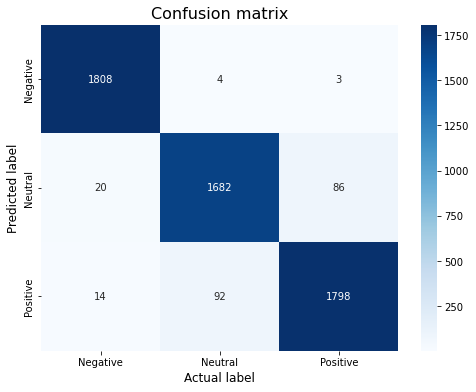

In [93]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,rf_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

 <font color='blue'>
When applying several models to our data set we can see that depending on the model the accuracy of the data can vary in this case we apply a simple analysis showing in each model its effectiveness, the models used were
    
--GradientBoostingClassifier
--Naïve Bayes
--XGBClassifier
--RandomForest
--Decision Tree
    
For this case and the data that we wanted to evaluate, all the models have a high level of accuracy since they are all above 80%, the one that is closest to what we need is RandomForest, because this model works well since we can used for regression and classification problems and our data set is a classification problem
    
    
the values of our confusion matrix are found on the main diagonal a = 1751 to i= 1749 this corresponds to the values correctly interpreted by the model both as the true positives TP(d) and the net positive values TN(a)

the other diagonal represents all the cases where the model has been wrong in b,c,e,f,g and h

If we remember, the accuracy (or «accuracy«) represents the percentage of correct predictions against the total. Therefore, it is the quotient between the cases well classified by the model (true positives and true negatives, that is, the values on the diagonal of the confusion matrix), and the sum of all the cases. gives us an accuracy of 0.95% was calculated as follows
(1751+1752+1749)/(1751+1752+1749+7+4+26+102+11+105+5507)=5252/5507 =0.95%

# Tokenization & skylearn for a model with continue input data

In [94]:
!pip install nltk

In [95]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

# In 'Twitter Sentiment Analysis - EDA and ML/DL', the name of airlines are not relevant to the sentiment analysis and added to the list of stop words.
# So I followed it.
def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(d):
    return word_tokenize(d)

[nltk_data] Downloading package stopwords to C:\Users\Admin-
[nltk_data]     edigomez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Admin-
[nltk_data]     edigomez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
df_Tweets_news['final_text']= df_Tweets_news.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
df_Tweets_news.final_text.head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: final_text, dtype: object

In [98]:
print(" ".join(df_Tweets_news.final_text[0]),'\n')
print(" ".join(df_Tweets_news.final_text[1]),'\n')
print(" ".join(df_Tweets_news.final_text[100]),'\n')
print(" ".join(df_Tweets_news.final_text[1000]),'\n')
print(" ".join(df_Tweets_news.final_text[10000]))

dhepburn said 

plus youve added commercials experience tacky 

trying add boy prince ressie sf thursday lax httptcogsbjcgm 

put bag plane seattle waiting line talk someone bag status matter 

waiting day atl since cancelled flightled standby told seats group shows late gets phl


 <font color='blue'>
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [99]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(" ".join(df_Tweets_news.final_text[0]))

[nltk_data] Downloading package vader_lexicon to C:\Users\Admin-
[nltk_data]     edigomez\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [100]:
texts = [" ".join(df_Tweets_news.final_text[i]) for i in range(len(df_Tweets_news))]

print(df_Tweets_news.text[0])
print(texts[0])
print(vader.polarity_scores(texts[0]), f'--> Actual Classification: {df_Tweets_news.airline_sentiment[0]}', '\n')

print(df_Tweets_news.text[25])
print(texts[25])
print(vader.polarity_scores(texts[25]), f'--> Actual Classification: {df_Tweets_news.airline_sentiment[25]}', '\n')

print(df_Tweets_news.text[575])
print(texts[575])
print(vader.polarity_scores(texts[575]), f'--> Actual Classification: {df_Tweets_news.airline_sentiment[575]}', '\n')

print(df_Tweets_news.text[5000])
print(texts[5000])
print(vader.polarity_scores(texts[5000]), f'--> Actual Classification: {df_Tweets_news.airline_sentiment[5000]}', '\n')

@VirginAmerica What @dhepburn said.
dhepburn said
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: 1 

@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response.
status match program applied three weeks called emailed response
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: 0 

@united in addition, my first flight was delayed an hour and I'm arriving at my destination 8 hrs Late Flight.
addition first delayed hour im arriving destination hrs late
{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.2263} --> Actual Classification: 0 

@SouthwestAir - neveryamind I paid $450 for a flight. 250 for a new bag is easy for business class customers, right? http://t.co/vn3JJIa53O
neveryamind paid new bag easy business class customers right httptcovnjjiao
{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404} --> Actual Classification: 0 



In [101]:
#Finalize text to classify
df_Tweets_news.final_text

0                                         [dhepburn, said]
1        [plus, youve, added, commercials, experience, ...
2        [didnt, today, must, mean, need, take, another...
3        [really, aggressive, blast, obnoxious, enterta...
4                                [really, big, bad, thing]
                               ...                        
14635                     [thank, got, different, chicago]
14636    [leaving, minutes, late, warnings, communicati...
14637                          [please, bring, blackberry]
14638    [money, change, dont, answer, phones, suggesti...
14639    [ppl, need, know, many, seats, next, plz, put,...
Name: final_text, Length: 14640, dtype: object

In [102]:
for i in range(len(df_Tweets_news)):
    df_Tweets_news['final_text'][i] = " ".join(df_Tweets_news['final_text'][i])

In [103]:
df_Tweets_news['final_text'][:10]

0                                        dhepburn said
1        plus youve added commercials experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
5    seriously would pay seats didnt playing really...
6    yes nearly every time fly vx ear worm wont go ...
7    really missed prime opportunity men without ha...
8                                        well didntbut
9                amazing arrived hour early youre good
Name: final_text, dtype: object

In [105]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0
    
df_Tweets_news.airline_sentiment = df_Tweets_news.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [106]:
X = df_Tweets_news.final_text
y = df_Tweets_news.airline_sentiment

In [107]:
df_Tweets_news['final_text']= df_Tweets_news.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
df_Tweets_news.final_text.head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: final_text, dtype: object

In [108]:
print(" ".join(df_Tweets_news.final_text[0]),'\n')
print(" ".join(df_Tweets_news.final_text[1]),'\n')
print(" ".join(df_Tweets_news.final_text[100]),'\n')
print(" ".join(df_Tweets_news.final_text[1000]),'\n')
print(" ".join(df_Tweets_news.final_text[10000]))

dhepburn said 

plus youve added commercials experience tacky 

trying add boy prince ressie sf thursday lax httptcogsbjcgm 

put bag plane seattle waiting line talk someone bag status matter 

waiting day atl since cancelled flightled standby told seats group shows late gets phl


Machine Learning approach¶

ML approach is also known as Document Classificaton. It uses ML/DL algorithm to classify the text data.

The most important in ML approach is to convert the text to the vector or other numeric format to make the algorithms understand the text as a feature.

    Vectorization : CountVectorizer, TfidfTransformer, Word2Vec
    Model: Logistic Regression, RandomForest, MultinomialNB, SupportVectorMachine, BiLSTM


In [109]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [113]:
df_Tweets_news.final_text

0                                            dhepburn said
1            plus youve added commercials experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                          thank got different chicago
14636    leaving minutes late warnings communication mi...
14637                              please bring blackberry
14638    money change dont answer phones suggestions ma...
14639    ppl need know many seats next plz put us stand...
Name: final_text, Length: 14640, dtype: object

In [114]:
for i in range(len(df_Tweets_news)):
    df_Tweets_news['final_text'][i] = " ".join(df_Tweets_news['final_text'][i])

In [115]:
df_Tweets_news['final_text'][:10]

0                            d h e p b u r n   s a i d
1    p l u s   y o u v e   a d d e d   c o m m e r ...
2    d i d n t   t o d a y   m u s t   m e a n   n ...
3    r e a l l y   a g g r e s s i v e   b l a s t ...
4              r e a l l y   b i g   b a d   t h i n g
5    s e r i o u s l y   w o u l d   p a y   s e a ...
6    y e s   n e a r l y   e v e r y   t i m e   f ...
7    r e a l l y   m i s s e d   p r i m e   o p p ...
8                            w e l l   d i d n t b u t
9    a m a z i n g   a r r i v e d   h o u r   e a ...
Name: final_text, dtype: object

<font color='red'>
Feedback: 
    
 Text analysis is good; preprcoessing, transforming, and model development steps are done properly. The models are well explained and the results are satosfactorily discussed. The flow of the analysis is fine and charts/graphs are used to support the analysis parts. However, a preliminary discussion about the costs of errors is missing. 
    
</font>

# Data analysis Part 2.
# If in answering Question 3c. you applied a clustering (classification or regression) algorithm, now apply a classification (clustering) algorithm and explain the results. Provide the Python code. % # Provide the evaluation metrics. Explain the evaluation metrics.

No classification method was on the model for 3c

# Cost Analisis

<font color='blue'>

    
Cost estimation can become increasingly difficult, time-consuming, and resource-intensive when it cannot be done analytically. If traditional cost estimation techniques are usable under these circumstances, they have important limitations. Data science helps us with some techniques to overcome some of those limitations. Applying machine learning to data reveals non-obvious patterns and relationships that can be used to predict the costs of new assemblies with acceptable accuracy.
    
We have calculated the accuracy of this classification model, in order to define the accuracy by means of the number of correct decisions divided by the total number of decisions made. this application can be simplistic and easy for machine learning models related to data mining, like the example we just worked on, it is difficult to have precision for this case we do not need it to be exact since in this model some classes are more frequent than others and this can lead us to make mistakes.

It is important to understand this difference between accuracy and precision for this cost analysis.
accuracy and precision are not equivalent. Precision refers to the dispersion of the set of values ​​obtained from repeated measurements of a quantity. The smaller the dispersion, the greater the precision. Accuracy refers to how close the measured value is to the actual value. In statistical terms, accuracy is related to the bias of an estimate. The smaller the bias, the more accurate an estimate. When the accuracy of a result is expressed, it is expressed by the absolute error, which is the difference between the experimental value and the true value. (https://es.wikipedia.org/wiki/Precisi%C3%B3n_y_exactitud)


As we saw in our data analysis, the negative opinions outweigh the neutral and positive ones, and after seeing some analyzes done, such as the scatter plot, our model cannot be neither exact nor precise, for that reason we can go for an estimated binary classification.

For this we can use the confusion matrix to be able to simulate or generate a cost conclusion.

(https://es.wikipedia.org/wiki/Precisi%C3%B3n_y_exactitud)
That is, accuracy is the ratio of true results (both true positives (TP) and true negatives (TN)) to the total number of cases examined (true positives, false positives, true negatives, false negatives). In clear context for semantics, it is often referred to as "Rand accuracy" or "Rand index".8910 It is a parameter of the test.
     
An accuracy of 100% means that the measured values ​​are exactly the same as the given ones.

On the other hand, the precision or positive predictive value is defined as the proportion of true positives against all positive results (both true positives and false positives).
    
based on the logistic classification model we could take where the total T = 5507 where the P = 1887 and the N = 1842 and the NT = 1778
    
the data set does not include any significant figures for estimating cost-based values.

1. accuaracy = number of correct decisions made / total number of decisions made
  accuray = 1887/5507 = 0.32

We must also keep in mind that unbalanced classes can be a problem to take the cost estimate

By taking this data arbitrarily we can determine that if an opinion is negative it must have a cost, but if the opinion is negative but the model evaluated it as positive this can lead to a higher cost or else one or positive or the model takes it as negative.
    
    
    Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1815
           1       0.95      0.94      0.94      1788
           2       0.95      0.94      0.95      1904

    accuracy                           0.96      5507
   macro avg       0.96      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507
    
    
    As a conclusion we can understand that our model has an accuracy of 96% which if we use the confusion matrix to estimate the cost we could say that the metrics are exact and the cost benefit would be high.

but also keep in mind that this analysis is based on unrealistic assumptions.
